In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
X = df.iloc[:, 3:].values

## Using the dendogram to find the optimal number of clusters

We have our dendogram below. How do we find the optimal number of clusters? We find the longest vertical line (largest Euclidean distance) such that we can move vertically without touching any horizontal bars.

We can conclude that the optimal number of clusters is 5. However, looking at the chart we could of easily of picked 3 clusters and that would of still given us a good result.

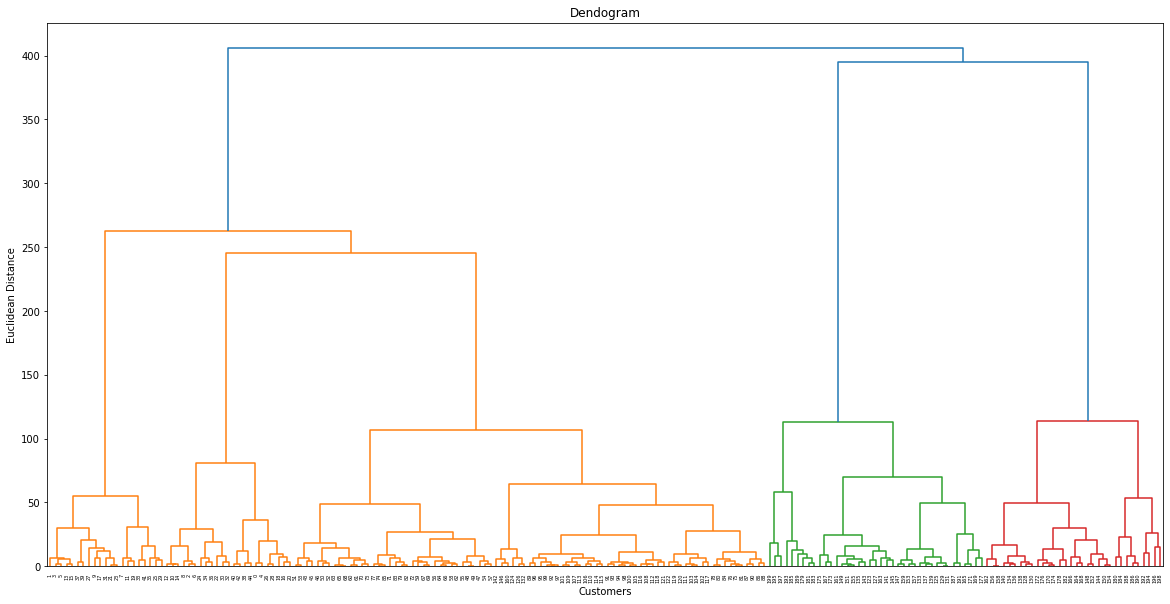

In [12]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(20, 10))

method = sch.linkage(X, method='ward')
dendogram = sch.dendrogram(method)

plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

## Training the Hierarchical Clustering model

### 5 Clusters

In [17]:
from sklearn.cluster import AgglomerativeClustering

hc_5 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hc_5 = hc_5.fit_predict(X)
y_hc_5

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

### 3 Clusters

In [18]:
hc_3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hc_3 = hc_3.fit_predict(X)
y_hc_3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

## Visualising the clusters

### 5 Clusters

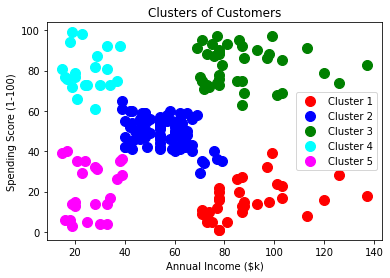

In [19]:
plt.scatter(X[y_hc_5==0, 0], X[y_hc_5==0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_hc_5==1, 0], X[y_hc_5==1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_hc_5==2, 0], X[y_hc_5==2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_hc_5==3, 0], X[y_hc_5==3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_hc_5==4, 0], X[y_hc_5==4, 1], s=100, c='magenta', label='Cluster 5')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income ($k)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### 3 Clusters

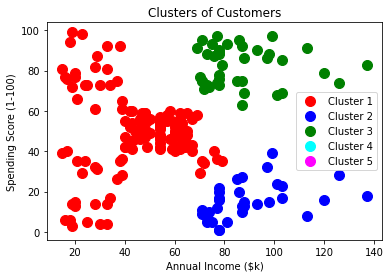

In [20]:
plt.scatter(X[y_hc_3==0, 0], X[y_hc_3==0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_hc_3==1, 0], X[y_hc_3==1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_hc_3==2, 0], X[y_hc_3==2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_hc_3==3, 0], X[y_hc_3==3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_hc_3==4, 0], X[y_hc_3==4, 1], s=100, c='magenta', label='Cluster 5')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income ($k)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

After visualising we can see that actually 5 clusters is far better. Applying 3 clusters groups low income customers regardless of their spending.

Regardless of whether we using 3 or 5 clusters we still group our high income customers into separate groups which is what we want as they will be the main target market of our marketing campaigns.